# Initialization

In [1]:
import matplotlib.animation as animation
import numpy as np
import networkx as nx
import operator
import math
import copy
import random
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [2]:
G = nx.Graph() # A two-dimensional grid graph 
#G = nx.grid_2d_graph(5, 5)
G.add_nodes_from(['a','b','c','d','e'])
G.add_edges_from([(x,y)for x in ['a','b','c','d','e'] for y in ['a','b','c','d','e']])

In [2]:
#initialization
def create_environment(grid_length,nodes_list,max_node_energy,*seeds):
    #This function try to some noise inside the environment, 
    #which means that some points may have really high values and some points may only have lower points
    pos_dict = {}
    noise_dict = {}
    if len(seeds)==0:
        np.random.seed(1314)
    else:
        np.random.seed(seeds)
    for i in nodes_list:
        x_node = np.random.randint(0,grid_length)
        y_node = np.random.randint(0,grid_length)
        pos_dict[i] = (x_node,y_node)
    for i in range(int(grid_length**2/2)):
        x = np.random.randint(0,grid_length)
        y = np.random.randint(0,grid_length)
        noise_value = np.random.randint(0,max_node_energy*2)
        noise_dict[(x,y)] = noise_value
        
    return pos_dict,noise_dict

In [83]:
#test Function
pos_dict,noise_dict = create_environment(7,['a','b','c','d'],20)
print(pos_dict)
print(noise_dict)
(0,4) in noise_dict

{'a': (5, 5), 'b': (3, 3), 'c': (0, 4), 'd': (5, 2)}
{(0, 4): 39, (0, 3): 13, (5, 6): 38, (3, 3): 34, (6, 3): 15, (3, 6): 15, (2, 4): 22, (5, 3): 13, (1, 1): 21, (0, 1): 6, (6, 5): 14, (5, 0): 9, (6, 4): 1, (2, 2): 39, (4, 3): 38, (3, 2): 24, (6, 6): 35, (2, 1): 21}


True

In [3]:
#initialization
def node_energy(noise_dict,grid_length, max_node_energy,*seeds):
    #This function setting the nodes environment and noise inside environment 
    #input x coordinate value and y coordinate value. And the index mentions which node should be changed this time
    #output a vector of node energy 
    #node can move back or foward. we record all change of nodes in a vector for easy calculation.
    # we have two different vector list one for x, and another one for y
    all_nodes_energy = {}
    if len(seeds)==0:
        np.random.seed(1310)
    else:
        np.random.seed(seeds)
    
    for x in range(grid_length):
        for y in range(grid_length):
            if (x,y) not in list(noise_dict.keys()):
                all_nodes_energy[(x,y)] = np.random.randint(0,max_node_energy)
            else:
                
                all_nodes_energy[(x,y)] = noise_dict[(x,y)]
    
    return  all_nodes_energy

In [76]:
#test Function
all_nodes_energy = node_energy(noise_dict,7, 20)
print(all_nodes_energy)

{(0, 0): 16, (0, 1): 6, (0, 2): 12, (0, 3): 13, (0, 4): 39, (0, 5): 5, (0, 6): 6, (1, 0): 7, (1, 1): 21, (1, 2): 10, (1, 3): 8, (1, 4): 16, (1, 5): 5, (1, 6): 7, (2, 0): 7, (2, 1): 21, (2, 2): 39, (2, 3): 12, (2, 4): 22, (2, 5): 17, (2, 6): 9, (3, 0): 6, (3, 1): 12, (3, 2): 24, (3, 3): 34, (3, 4): 2, (3, 5): 18, (3, 6): 15, (4, 0): 13, (4, 1): 0, (4, 2): 11, (4, 3): 38, (4, 4): 0, (4, 5): 13, (4, 6): 15, (5, 0): 9, (5, 1): 13, (5, 2): 4, (5, 3): 13, (5, 4): 1, (5, 5): 19, (5, 6): 38, (6, 0): 9, (6, 1): 0, (6, 2): 5, (6, 3): 15, (6, 4): 1, (6, 5): 14, (6, 6): 35}


In [7]:
en2_dict={(0, 0): 1, (0, 1): 1, (0, 2): 1, (0, 3): 1, (0, 4): 1, (0, 5):1, (0, 6): 1,
          (1, 0): 2, (1, 1): 2, (1, 2): 2, (1, 3): 8, (1, 4): 2, (1, 5): 2, (1, 6): 2,
          (2, 0): 1, (2, 1): 3, (2, 2): 3, (2, 3): 3, (2, 4): 3, (2, 5): 3, (2, 6): 3, 
          (3, 0): 4, (3, 1): 4, (3, 2): 7, (3, 3): 4, (3, 4): 4, (3, 5): 4, (3, 6): 4,
          (4, 0): 5, (4, 1): 5, (4, 2): 5, (4, 3): 5, (4, 4): 5, (4, 5): 5, (4, 6): 5, 
          (5, 0): 6, (5, 1): 6, (5, 2): 6, (5, 3): 6, (5, 4): 6, (5, 5): 6, (5, 6): 6, 
          (6, 0): 7, (6, 1): 7, (6, 2): 7, (6, 3): 7, (6, 4): 1, (6, 5): 7, (6, 6): 7}

In [4]:
doctrine_node = ['customer', 'Online_Image_Manipution', 'Online_Photo_Storage', 
                 'Web_Site', 'Print','Platform', 'CRM', 'Compute', 'Data_Centre', 'Power']
doctrine_edge =[('customer', 'Online_Image_Manipution'),('customer', 'Online_Photo_Storage'),('customer', 'Web_Site'),( 'customer', 'Print'),
                ('Online_Image_Manipution', 'Online_Photo_Storage'),('Online_Photo_Storage', 'Web_Site'),( 'Web_Site', 'Print'),
                ('Web_Site', 'Platform'),('Web_Site', 'CRM'),('Platform','Compute'),
                ('CRM','Compute'),('Compute','Data_Centre'),('Compute','Power'),('Data_Centre','Power')]
Doctrine = nx.Graph()
Doctrine.add_edges_from([doctrine_edge[0],doctrine_edge[4],doctrine_edge[6],doctrine_edge[8]], weight = 0.5)
Doctrine.add_edges_from([doctrine_edge[1],doctrine_edge[11]], weight = 1)
Doctrine.add_edges_from([doctrine_edge[2],doctrine_edge[9],doctrine_edge[10]], weight = 2)
Doctrine.add_edges_from([doctrine_edge[3],doctrine_edge[7],doctrine_edge[12]], weight = 1.5)
Doctrine.add_edges_from([doctrine_edge[5],doctrine_edge[13]], weight = 2.5)
Doctrine_pos={doctrine_node[0]:(2,5.7),
              doctrine_node[1]:(0.5,5),
              doctrine_node[2]:(1,4.5),
              doctrine_node[3]:(4,4),
              doctrine_node[4]:(3.7,4.6),
              doctrine_node[5]:(3,2.5),
              doctrine_node[6]:(4.5,3),
              doctrine_node[7]:(4.6,1),
              doctrine_node[8]:(3.3,0.5),
              doctrine_node[9]:(5.8,0.5)}

Text(0,0.5,'Value Chain')

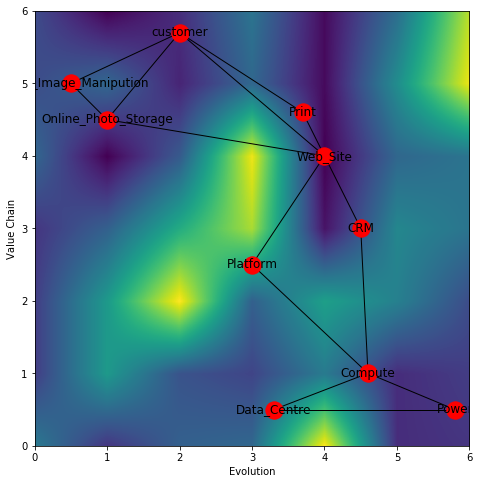

In [9]:
en1=np.array(list(all_nodes_energy.values())).reshape(7,7)
plt.figure(figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(en1,interpolation = 'bilinear')
plt.axis([0,6,0,6])
nx.draw_networkx_nodes(Doctrine,Doctrine_pos)
nx.draw_networkx_labels(Doctrine, Doctrine_pos)
nx.draw_networkx_edges(Doctrine,Doctrine_pos,edgelist=doctrine_edge)
plt.xlabel('Evolution')
plt.ylabel('Value Chain')


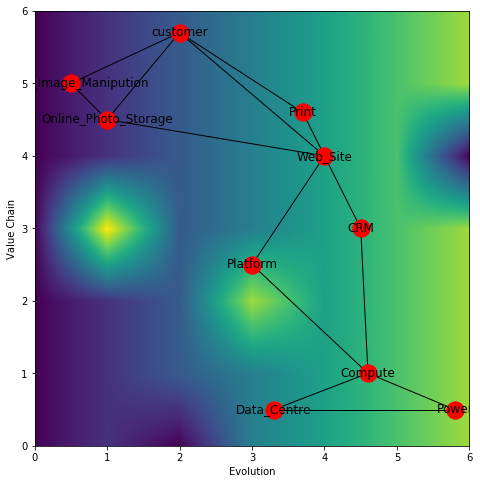

In [10]:
en2=np.array(list(en2_dict.values())).reshape(7,7).T
plt.figure(figsize=(8,8))
plt.subplot(1,1,1)
nx.draw_networkx_nodes(Doctrine,Doctrine_pos)
nx.draw_networkx_labels(Doctrine, Doctrine_pos)
nx.draw_networkx_edges(Doctrine,Doctrine_pos,edgelist=doctrine_edge)
plt.imshow(en2,interpolation = 'bilinear')
plt.axis([0,6,0,6])
plt.xlabel('Evolution')
plt.ylabel('Value Chain')
plt.show()

In [4]:
def edge_energy(pos_dict,sumORlist):
#This function try to create environment for edge, we give a matrix for all horizontal edges, second matrix for all vertical edges 
# The third matrix for edge from left up to right down, and the fourth matrix for edge from right up to left down.
    nodes_list = list(pos_dict.values())
    edge_energy = [math.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2) for node1 in nodes_list for node2 in nodes_list]
    if sumORlist =='sum':
        total_edge_energy_for_this_pos = sum(edge_energy)
        return total_edge_energy_for_this_pos
    elif sumORlist == 'list':
        return edge_energy
    

In [12]:
#test_function
total_edge_energy_for_this_pos = edge_energy(pos_dict,'sum')
print(total_edge_energy_for_this_pos)
total_edge_energy_list_for_this_pos = edge_energy(pos_dict,'list')
print(total_edge_energy_list_for_this_pos)

43.42191416628329
[0.0, 2.8284271247461903, 5.0990195135927845, 3.0, 2.8284271247461903, 0.0, 3.1622776601683795, 2.23606797749979, 5.0990195135927845, 3.1622776601683795, 0.0, 5.385164807134504, 3.0, 2.23606797749979, 5.385164807134504, 0.0]


In [5]:
def transfer_cost(node_now,node_new):
    #input x coordinate value and y coordinate value of one node
    #output a vector of transsfer cost
    #node can move back or foward. we record all change of nodes in a vector for easy calculation.
    # we have two different vector list one for x, and another one for y
    if node_now!= node_new:
        x1 = node_now[0]
        x2 =node_new[0]
        y1 = node_now[1]
        y2 =node_new[1]
        cost= abs((np.exp(x2)-np.exp(x1))/np.exp(x1))
    else:
        cost = 0
    return cost #|(e^t1-e^t2)/(e^t2)|

In [14]:
print(transfer_cost((1,1),(2,2)))
print(transfer_cost((1,1),(1,1)))
print(transfer_cost((2,2),(1,1)))

1.7182818284590455
0
0.6321205588285578


In [6]:
def total_energy(pos_dict,all_nodes_energy,node_now,node_new):
    # This function add all the energy together
    edge = edge_energy(pos_dict,'sum')# after transfer value
    node = sum([all_nodes_energy[index] for index in list(pos_dict.values())])# after transfer value
    if node_new in list(pos_dict.values()):
        transfer = transfer_cost(node_now,node_new)# node_new is the node after transfer.
    else:
        print('Wrong new nodes! Check your input')
        transfer = 1000000
    cost = edge+node+transfer
    return cost

In [16]:
total_energy(pos_dict,all_nodes_energy,(1,1),(3,3))

145.8109702652139

# Algorithm 1 (Global Optimisation)

In [7]:
def search_max_energy_node(pos_dict,all_nodes_energy):
    # This function search for the node with max energy
    node_energy_dict= {}
    which_node ='x'
    for index in list(pos_dict.values()):
        node_energy_dict[index] = all_nodes_energy[index]
    #max value    
    ''' if len(target)!=0 and target in node_energy_dict:
        del node_energy_dict[target]'''
    max_value_node = max(node_energy_dict.items(), key=operator.itemgetter(1))
    for name, value in pos_dict.items():
        if value == max_value_node[0]:
            which_node = name
    return [which_node, max_value_node[0],max_value_node[1]]

In [78]:
print(search_max_energy_node(pos_dict,all_nodes_energy))

['c', (0, 4), 39]


In [8]:
def search_max_energy_nodePLUSedge(pos_dict,all_nodes_energy):
    # This functiion not only search for the max nodes energy but also add the edge energy inside. 
    #when the edge has more weight than nodes, then we need to use this function rather the function 'search_max_energy_node'
    node_energy_dict= {}
    which_node ='x'
    edge = [sum(i) for i in  np.asarray(edge_energy(pos_dict,'list')).reshape((4,4))]
    for i,index in enumerate(list(pos_dict.values())):
        node_energy_dict[index] = all_nodes_energy[index]+ edge[i]
    #max value  
    max_value_node = max(node_energy_dict.items(), key=operator.itemgetter(1))
    for name, value in pos_dict.items():
        if value == max_value_node[0]:
            which_node = name    
    return [which_node, max_value_node[0],max_value_node[1]]

In [20]:
print(search_max_energy_nodePLUSedge(pos_dict,all_nodes_energy))

['c', (0, 4), 52.646461980895666]


In [39]:
def globalOptimisition(pos_dict,all_nodes_energy):
    node_now = None
    energy_now = total_energy(pos_dict,all_nodes_energy,list(pos_dict.values())[0],list(pos_dict.values())[0])
    # we initial energy as nodes energy add edge energy

    cache_for_transfer_cost = [0]
    cache_for_each_step ={}#This dict will record minimum energy and the points' position  at each step,
    cache_for_each_step[energy_now]= copy.deepcopy(pos_dict)
    #and energy is key , the points' position is values
    iter_num= 0

    while True:
        iter_num +=1
        pos = copy.deepcopy(pos_dict)#pos change it everytime when we move the points 
        max_energy_node = search_max_energy_node(pos,all_nodes_energy)
        #max_energy_node = search_max_energy_nodePLUSedge(pos_dict,all_nodes_energy)
        node_now = max_energy_node[1]
        energy_dict={}

        for new_node in all_nodes_energy:
            pos[max_energy_node[0]] = new_node
            energy_dict[new_node] =total_energy(pos,all_nodes_energy,node_now,new_node)

        min_energy_node=  min(energy_dict.items(), key=operator.itemgetter(1))
        if energy_now < min_energy_node[1]:
            print('stop1')
            break
        elif abs(energy_now - min_energy_node[1])< 10e-8:
            print('stop2')
            break
        elif iter_num >100:
            break
        else:
            pos[max_energy_node[0]]=min_energy_node[0]
            if pos == pos_dict:
                print('stop3')
                break

        cache_for_transfer_cost.append(sum(cache_for_transfer_cost)+transfer_cost(max_energy_node[1],min_energy_node[0]))
        energy_now = min_energy_node[1]   
        pos_dict[max_energy_node[0]]=min_energy_node[0]
        pos_recording = copy.deepcopy(pos_dict)
        cache_for_each_step.update({min_energy_node[1]:pos_recording}) 
        
    return cache_for_each_step, cache_for_transfer_cost

In [40]:
pos_dict,noise_dict = create_environment(7,['a','b','c','d'],20)
all_nodes_energy = node_energy(noise_dict,7, 20)
cache_for_each_step,cache_for_transfer_cost=globalOptimisition(pos_dict,all_nodes_energy)

stop3


In [41]:
cache_for_each_step

{1.718281828459045: {'a': (4, 4), 'b': (4, 4), 'c': (4, 4), 'd': (4, 4)},
 8.632120558828557: {'a': (4, 4), 'b': (4, 4), 'c': (3, 4), 'd': (4, 4)},
 30.990182258422188: {'a': (4, 4), 'b': (4, 4), 'c': (3, 4), 'd': (5, 2)},
 41.22550310950124: {'a': (4, 4), 'b': (4, 4), 'c': (1, 5), 'd': (5, 2)},
 67.34340022854157: {'a': (5, 5), 'b': (4, 4), 'c': (1, 5), 'd': (5, 2)},
 103.50412628244338: {'a': (5, 5), 'b': (3, 3), 'c': (1, 5), 'd': (5, 2)},
 139.42191416628327: {'a': (5, 5), 'b': (3, 3), 'c': (0, 4), 'd': (5, 2)}}

In [42]:
cache_for_transfer_cost

[0,
 1.718281828459045,
 3.43656365691809,
 5.786966044205693,
 17.33086762851348,
 28.904799716924867,
 58.89576070348023]

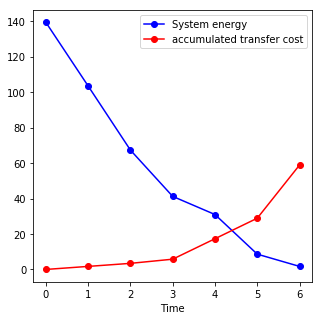

In [43]:
plt.figure(figsize = (5,5))
plt.plot(list(cache_for_each_step.keys()),'bo-',label='System energy')
plt.plot(cache_for_transfer_cost,'ro-',label='accumulated transfer cost')
plt.xlabel('Time')
#plt.ylabel('Energy')
plt.legend()
plt.show()

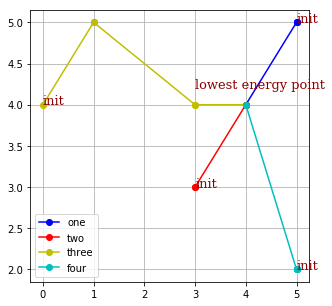

In [86]:
a_track = [value['a'] for value in list(cache_for_each_step.values())]
b_track = [value['b'] for value in list(cache_for_each_step.values())]
c_track = [value['c'] for value in list(cache_for_each_step.values())]
d_track = [value['d'] for value in list(cache_for_each_step.values())]
plt.figure(figsize = (5,5))
plt.plot(*zip(*a_track),'bo-',label='one')
plt.plot(*zip(*b_track),'ro-',label='two')
plt.plot(*zip(*c_track),'yo-',label='three')
plt.plot(*zip(*d_track),'co-',label='four')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }
plt.text(0, 4, r'init', fontdict=font)
plt.text(5, 5, r'init', fontdict=font)
plt.text(3, 3, r'init', fontdict=font)
plt.text(5, 2, r'init', fontdict=font)
plt.text(3, 4.2, r'lowest energy point', fontdict=font)
plt.grid()
plt.legend()
plt.show()

# Algorithm 2 (multi-agent coop-pathfinder)

In [52]:
def findConvergencePoints(all_nodes_energy):
    #This function try to find zero nodes energy points
    return [item[0] for item in  list(all_nodes_energy.items()) if item[1]==min(list(all_nodes_energy.values()))]

In [665]:
findConvergencePoints(all_nodes_energy)

[(11, 14), (23, 20), (26, 27)]

In [44]:
def manhattanDistance(stateNow,target):
    # ret7urn the manhattan Distance
    #the type should be tuple
    x_stateNow = stateNow[0]
    y_stateNow = stateNow[1]
    x_target = target[0]
    y_target =target[1]
    return abs(x_target - x_stateNow)+ abs(y_target - y_stateNow)

In [15]:
def findTarget(pos_dict,zeroEnergyPoints):
    #This function try to find the shortest manhattan distance between all the initial points with all zero energy nodes 
    #and the zero energy points with shortest Manhattan can be the possible target
    #Output: a list of zero enery points with the shortest manhattan distance among all zero energy points
    distance_dict ={}
    for zeroPoint in zeroEnergyPoints:
        distance =0
        for item in list(pos_dict.values()):
            distance += manhattanDistance(zeroPoint,item)   #abs(x_z-x_item)+abs(y_z-y_item)
        distance_dict[zeroPoint]=distance
    shortest_dictance = min(distance_dict.items(), key=operator.itemgetter(1))[1]
    shortest_dictance_zeroPoints = [item[0] for item in list(distance_dict.items()) if item[1]== shortest_dictance]
    return shortest_dictance_zeroPoints

In [45]:
zeroEnergyPoints= [(4, 1), (4, 3), (4,4),(6, 1)]#findConvergencePoints(all_nodes_energy)
findTarget(pos_dict,zeroEnergyPoints)

[(4, 4)]

In [74]:
'''def checkSame(pos_dict,pos):
    pos_old =copy.deepcopy(pos_dict) 
    pos_new =copy.deepcopy(pos)
    for item in list(pos_old.items()):
        for another in list(pos_new.items()):
            if item[1]==another[1]:
                del pos_old[item[0]]
                del pos_new[another[0]]
                break
                
    if len(pos_old)==0:
        return True
    else:
        return False
 '''       

'def checkSame(pos_dict,pos):\n    pos_old =copy.deepcopy(pos_dict) \n    pos_new =copy.deepcopy(pos)\n    for item in list(pos_old.items()):\n        for another in list(pos_new.items()):\n            if item[1]==another[1]:\n                del pos_old[item[0]]\n                del pos_new[another[0]]\n                break\n                \n    if len(pos_old)==0:\n        return True\n    else:\n        return False\n '

In [75]:
'''a ={'a': (1, 4), 'b': (4, 1), 'c': (1, 5), 'd': (4, 1)}
b={'a': (4, 1), 'b': (1, 4), 'c': (1, 5), 'd': (4, 1)}
checkSame(a,b)'''

"a ={'a': (1, 4), 'b': (4, 1), 'c': (1, 5), 'd': (4, 1)}\nb={'a': (4, 1), 'b': (1, 4), 'c': (1, 5), 'd': (4, 1)}\ncheckSame(a,b)"

In [16]:
def createTrackDict(pos_dict):
    track_dict={}
    for item in pos_dict.items():
        track_dict[item[0]]=[item[1]]
    return track_dict

In [77]:
a ={'a': (1, 4), 'b': (4, 1), 'c': (1, 5), 'd': (4, 1)}
dict_a=createTrackDict(a)
dict_a['a'].append((2,3))
dict_a

{'a': [(1, 4), (2, 3)], 'b': [(4, 1)], 'c': [(1, 5)], 'd': [(4, 1)]}

In [17]:
def movingstrategy(agent_name, state_now, target, pos_dict, all_nodes_energy, track_dict_value_list):
    generalMove =[-1,0,1]
    x_state_now = state_now[0]
    y_state_now = state_now[1]
    manhattanDistance_now = manhattanDistance(state_now, target)
    
    valid_orientation =[(x_state_now +i,y_state_now+ j) for i in generalMove for j in generalMove 
                        if (x_state_now +i,y_state_now+ j) in list(all_nodes_energy.keys())]# This step bound the moving in grid
    #print(valid_orientation)

    avoid_repeat_orientation = [item for item in valid_orientation if item not in track_dict_value_list]
    #print(avoid_repeat_orientation)
    convergence_orientation =[item for item in avoid_repeat_orientation if manhattanDistance(item, target)<manhattanDistance_now]
    #convergence_orientation step find the place with decreasing manhattan distance 
    #print(convergence_orientation)
    energy_dict = {}
    
    for position in convergence_orientation:
        
        pos_copy = copy.deepcopy(pos_dict)#ignore the pos_dict change at there
        pos_copy[agent_name]= position
        energy = total_energy(pos_copy,all_nodes_energy,state_now,position)
        energy_dict[position]= energy
        
    lowest_energy = min(energy_dict.items(), key=operator.itemgetter(1))[1]
    lowest_energy_orientation_list = [item[0] for item in list(energy_dict.items()) if item[1]== lowest_energy]
    '''if len(lowest_energy_orientation_list)==1:
        test_pos= copy.deepcopy(pos_dict)
        test_pos[agent_name]=lowest_energy_orientation_list[0]
        if test_pos==pos_dict:# prevent dead lock
            del energy_dict[lowest_energy_orientation_list[0]]
            second_lowest_energy = min(energy_dict.items(), key=operator.itemgetter(1))[1]
            lowest_energy_orientation_list = [item[0] for item in list(energy_dict.items()) if item[1]== second_lowest_energy]  '''         
    return random.choice(lowest_energy_orientation_list)# 
            

In [79]:
#test function each step
valid_orientation =[(6+i,3+ j) for i in [-1,0,1] for j in [-1,0,1]
                        if (6 +i,3+ j) in list(all_nodes_energy.keys())]
print(valid_orientation)
target = (4,4)
now = (6,3)
[item for item in valid_orientation if manhattanDistance(item, target)<manhattanDistance(now,target)]

[(5, 2), (5, 3), (5, 4), (6, 2), (6, 3), (6, 4)]


[(5, 3), (5, 4), (6, 4)]

In [80]:
pos_dictxx= {'a': (6, 3), 'b': (3, 3), 'c': (0, 4), 'd': (5, 2)}
track_dict_value_list =[(5, 3)]
movingstrategy('a', (6,3), (4,4), pos_dictxx, all_nodes_energy, track_dict_value_list)

(5, 2)

In [28]:
def localSearch(all_nodes_energy,pos_dict, transform_weight_value ):
    
    node_now = None
    energy_now = total_energy(pos_dict,all_nodes_energy,list(pos_dict.values())[0],list(pos_dict.values())[0])
    # we initial energy as nodes energy add edge energy

    global_cost = 0 # cost is different from energy_now, this is a accumulate value during the whole agnets moving 

    zeroEnergyPoints = findConvergencePoints(all_nodes_energy)
    targets = findTarget(pos_dict,zeroEnergyPoints) #mark target
    test_item_num = 10# for each target, we run test_item_num times to find the best policy

    cache_for_global_transfer_cost = [0]

    global_cache_for_each_step ={}#This dict will record minimum energy and the points' position  at each step,
    global_cache_for_each_step[energy_now]= copy.deepcopy(pos_dict)
    #and energy is key , the points' position is values

    transform_weight= transform_weight_value# A weight in [0,1]. Becajuse we work in an fuzzy system, sometime system energy decrease but transform cost increase.
    # we set an transform_weight for the situation that  :
    #when global system energy decrease and transform increasing < (2-transform_weight)*old_transform_Cost, then we update the global cache
    i =0
    for target in targets:
        cache_for_local_transfer_cost = [0]
        local_cost =0
        local_cache_for_each_step = {}
        local_cache_for_each_step[energy_now]= copy.deepcopy(pos_dict)

        for find_role_num in range(test_item_num):

            cache_for_local_transfer_cost = [0]
            pos = copy.deepcopy(pos_dict)#pos change it everytime when we move the points 
            track_dict = createTrackDict(pos_dict)

            while all(value == target for value in list(pos.values()))!= True:
                #for agent_i in list(pos.items()):
                agent_i = search_max_energy_node(pos,all_nodes_energy)
                if agent_i[2]==0:
                    break
                track_dict_value_list=track_dict[agent_i[0]]
                if agent_i[1]!=target:
                    agent_name = agent_i[0]
                    agent_position = agent_i[1]
                    moving = movingstrategy(agent_name, agent_position, target, pos, all_nodes_energy,track_dict_value_list)
                    pos[agent_name]=moving
                    energy= total_energy(pos,all_nodes_energy,agent_position,moving)
                    local_cost += energy
                    cache_for_local_transfer_cost.append(sum(cache_for_local_transfer_cost)+transfer_cost(agent_position,moving))
                    local_cache_for_each_step.update({energy:copy.deepcopy(pos)})
                    track_dict[agent_name].append(moving)
                else:
                    next
            if global_cost ==0:
                global_cost = local_cost
                cache_for_global_transfer_cost = cache_for_local_transfer_cost
                global_cache_for_each_step = copy.deepcopy(local_cache_for_each_step)
            else:
                global_trans = cache_for_global_transfer_cost[-1]
                local_trans =cache_for_local_transfer_cost[-1]

                if global_cost < local_cost and local_trans <= global_trans:
                    global_cost = local_cost
                    cache_for_global_transfer_cost = cache_for_local_transfer_cost
                    global_cache_for_each_step = local_cache_for_each_step#copy.deepcopy(local_cache_for_each_step)

                elif global_cost < local_cost and local_trans > global_trans:
                    old_system_energy = (global_cost - global_trans)*(1-transform_weight)+ global_trans*transform_weight
                    new_system_energy = (local_cost - local_trans)*(1-transform_weight)+ local_trans*transform_weight

                    if new_system_energy < old_system_energy:
                        global_cost = local_cost
                        cache_for_global_transfer_cost = cache_for_local_transfer_cost
                        global_cache_for_each_step = local_cache_for_each_step#copy.deepcopy(local_cache_for_each_step)

                elif global_cost > local_cost and local_trans < global_trans:
                    old_system_energy = (global_cost - global_trans)*(1-transform_weight)+ global_trans*transform_weight
                    new_system_energy = (local_cost - local_trans)*(1-transform_weight)+ local_trans*transform_weight

                    if new_system_energy < old_system_energy:
                        global_cost = local_cost
                        cache_for_global_transfer_cost = cache_for_local_transfer_cost
                        global_cache_for_each_step = local_cache_for_each_step#copy.deepcopy(local_cache_for_each_step)
    return global_cache_for_each_step,cache_for_global_transfer_cost

In [19]:
def tranditionLocalSearch(all_nodes_energy,pos_dict, transform_weight_value ):
    
    node_now = None
    energy_now = total_energy(pos_dict,all_nodes_energy,list(pos_dict.values())[0],list(pos_dict.values())[0])
    # we initial energy as nodes energy add edge energy

    global_cost = 0 # cost is different from energy_now, this is a accumulate value during the whole agnets moving 

    zeroEnergyPoints = findConvergencePoints(all_nodes_energy)
    targets = findTarget(pos_dict,zeroEnergyPoints) #mark target
    test_item_num = 10# for each target, we run test_item_num times to find the best policy

    cache_for_global_transfer_cost = [0]

    global_cache_for_each_step ={}#This dict will record minimum energy and the points' position  at each step,
    global_cache_for_each_step[energy_now]= copy.deepcopy(pos_dict)
    #and energy is key , the points' position is values

    transform_weight= transform_weight_value# A weight in [0,1]. Becajuse we work in an fuzzy system, sometime system energy decrease but transform cost increase.
    # we set an transform_weight for the situation that  :
    #when global system energy decrease and transform increasing < (2-transform_weight)*old_transform_Cost, then we update the global cache
    i =0
    for target in targets:
        cache_for_local_transfer_cost = [0]
        local_cost =0
        local_cache_for_each_step = {}
        local_cache_for_each_step[energy_now]= copy.deepcopy(pos_dict)

        for find_role_num in range(test_item_num):

            cache_for_local_transfer_cost = [0]
            pos = copy.deepcopy(pos_dict)#pos change it everytime when we move the points 
            track_dict = createTrackDict(pos_dict)

            while all(value == target for value in list(pos.values()))!= True:
                for agent_i in list(pos.items()):
                    track_dict_value_list=track_dict[agent_i[0]]
                    if agent_i[1]!=target:
                        agent_name = agent_i[0]
                        agent_position = agent_i[1]
                        moving = movingstrategy(agent_name, agent_position, target, pos, all_nodes_energy,track_dict_value_list)
                        pos[agent_name]=moving
                        energy= total_energy(pos,all_nodes_energy,agent_position,moving)
                        local_cost += energy
                        cache_for_local_transfer_cost.append(sum(cache_for_local_transfer_cost)+transfer_cost(agent_position,moving))
                        local_cache_for_each_step.update({energy:copy.deepcopy(pos)})
                        track_dict[agent_name].append(moving)
                    else:
                        next
            if global_cost ==0:
                global_cost = local_cost
                cache_for_global_transfer_cost = cache_for_local_transfer_cost
                global_cache_for_each_step = copy.deepcopy(local_cache_for_each_step)
            else:
                global_trans = cache_for_global_transfer_cost[-1]
                local_trans =cache_for_local_transfer_cost[-1]

                if global_cost < local_cost and local_trans <= global_trans:
                    global_cost = local_cost
                    cache_for_global_transfer_cost = cache_for_local_transfer_cost
                    global_cache_for_each_step = local_cache_for_each_step#copy.deepcopy(local_cache_for_each_step)

                elif global_cost < local_cost and local_trans > global_trans:
                    old_system_energy = (global_cost - global_trans)*(1-transform_weight)+ global_trans*transform_weight
                    new_system_energy = (local_cost - local_trans)*(1-transform_weight)+ local_trans*transform_weight

                    if new_system_energy < old_system_energy:
                        global_cost = local_cost
                        cache_for_global_transfer_cost = cache_for_local_transfer_cost
                        global_cache_for_each_step = local_cache_for_each_step#copy.deepcopy(local_cache_for_each_step)

                elif global_cost > local_cost and local_trans < global_trans:
                    old_system_energy = (global_cost - global_trans)*(1-transform_weight)+ global_trans*transform_weight
                    new_system_energy = (local_cost - local_trans)*(1-transform_weight)+ local_trans*transform_weight

                    if new_system_energy < old_system_energy:
                        global_cost = local_cost
                        cache_for_global_transfer_cost = cache_for_local_transfer_cost
                        global_cache_for_each_step = local_cache_for_each_step#copy.deepcopy(local_cache_for_each_step)
    return global_cache_for_each_step,cache_for_global_transfer_cost

In [20]:
pos_dict,noise_dict = create_environment(7,['a','b','c','d'],20)
all_nodes_energy = node_energy(noise_dict,7, 20)

global_cache_for_each_step,cache_for_global_transfer_cost =localSearch(all_nodes_energy,pos_dict, 0.5)
global_cache_for_each_stepT,cache_for_global_transfer_costT = tranditionLocalSearch(all_nodes_energy,pos_dict, 0.5 )

In [21]:
global_cache_for_each_step

{1.718281828459045: {'a': (4, 4), 'b': (4, 4), 'c': (4, 4), 'd': (4, 4)},
 8.632120558828557: {'a': (4, 4), 'b': (4, 4), 'c': (3, 4), 'd': (4, 4)},
 26.319407987950584: {'a': (4, 4), 'b': (4, 4), 'c': (3, 4), 'd': (5, 2)},
 29.128990204491963: {'a': (4, 4), 'b': (4, 4), 'c': (3, 4), 'd': (5, 3)},
 50.52066437882688: {'a': (4, 4), 'b': (4, 4), 'c': (1, 4), 'd': (5, 2)},
 51.87365628938618: {'a': (4, 4), 'b': (4, 4), 'c': (2, 4), 'd': (5, 2)},
 77.20932806943928: {'a': (5, 5), 'b': (4, 4), 'c': (1, 4), 'd': (5, 2)},
 112.50989114918507: {'a': (5, 5), 'b': (3, 3), 'c': (1, 4), 'd': (5, 2)},
 139.42191416628327: {'a': (5, 5), 'b': (3, 3), 'c': (0, 4), 'd': (5, 2)}}

In [99]:
cache_for_global_transfer_cost

[0,
 1.718281828459045,
 3.43656365691809,
 5.786966044205693,
 12.660093358041873,
 25.320186716083747,
 48.92209160370845,
 98.47630376624546,
 198.0387688021214]

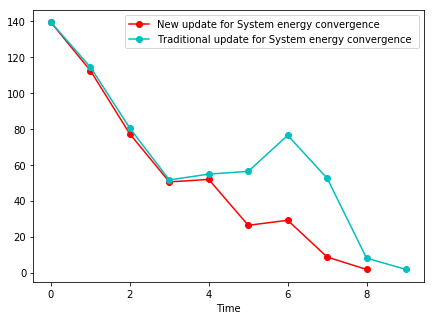

In [28]:
plt.figure(figsize = (7,5))
'''plt.subplot(4,1,1)
plt.plot(list(global_cache_for_each_step.keys()),'bo-',label='System energy')
plt.xlabel('Time')
plt.legend()
plt.subplot(4,1,2)
plt.plot(cache_for_global_transfer_cost,'ro-',label='accumulated transfer cost')
plt.xlabel('Time')
plt.legend()'''
plt.subplot(1,1,1)
plt.plot(list(global_cache_for_each_step.keys()),'ro-',label='New update for System energy convergence ')
plt.plot(list(global_cache_for_each_stepT.keys()),'co-',label='Traditional update for System energy convergence ')
plt.xlabel('Time')
plt.legend()
'''plt.subplot(4,1,4)
plt.plot([x/max(list(global_cache_for_each_step.keys())) for x in list(global_cache_for_each_step.keys())],'bo-',label='System energy')
plt.plot([y / max(cache_for_global_transfer_cost) for y in cache_for_global_transfer_cost],'ro-',label='accumulated transfer cost')
plt.xlabel('Time')
plt.legend()'''
plt.show()

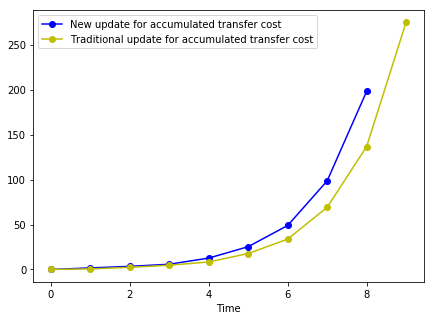

In [46]:
plt.figure(figsize = (7,5))
plt.subplot(1,1,1)
plt.plot(cache_for_global_transfer_cost,'bo-',label='New update for accumulated transfer cost')
plt.plot(cache_for_global_transfer_costT,'yo-',label='Traditional update for accumulated transfer cost')
plt.xlabel('Time')
plt.legend()
plt.show()

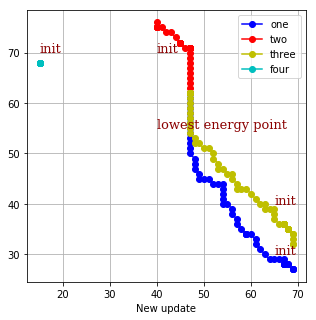

In [41]:
a_track = [value['a'] for value in list(global_cache_for_each_step.values())]
b_track = [value['b'] for value in list(global_cache_for_each_step.values())]
c_track = [value['c'] for value in list(global_cache_for_each_step.values())]
d_track = [value['d'] for value in list(global_cache_for_each_step.values())]
plt.figure(figsize = (5,5))
plt.plot(*zip(*a_track),'bo-',label='one')
plt.plot(*zip(*b_track),'ro-',label='two')
plt.plot(*zip(*c_track),'yo-',label='three')
plt.plot(*zip(*d_track),'co-',label='four')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }
plt.text(15, 70, r'init', fontdict=font)
plt.text(40, 70, r'init', fontdict=font)
plt.text(65, 30, r'init', fontdict=font)
plt.text(65, 40, r'init', fontdict=font)
plt.text(40, 55, r'lowest energy point', fontdict=font)
plt.xlabel('New update')
plt.grid()
plt.legend()
plt.show()

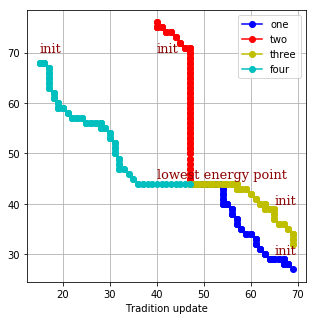

In [40]:
a_trackT = [value['a'] for value in list(global_cache_for_each_stepT.values())]
b_trackT = [value['b'] for value in list(global_cache_for_each_stepT.values())]
c_trackT = [value['c'] for value in list(global_cache_for_each_stepT.values())]
d_trackT = [value['d'] for value in list(global_cache_for_each_stepT.values())]
plt.figure(figsize = (5,5))
plt.plot(*zip(*a_trackT),'bo-',label='one')
plt.plot(*zip(*b_trackT),'ro-',label='two')
plt.plot(*zip(*c_trackT),'yo-',label='three')
plt.plot(*zip(*d_trackT),'co-',label='four')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }
plt.text(15, 70, r'init', fontdict=font)
plt.text(40, 70, r'init', fontdict=font)
plt.text(65, 30, r'init', fontdict=font)
plt.text(65, 40, r'init', fontdict=font)
plt.text(40, 45, r'lowest energy point', fontdict=font)
plt.xlabel('Tradition update')
plt.grid()
plt.legend()
plt.show()

# Performance

In [50]:
time_list_for_global1 =[]
time_list_for_local1 = []
max_trans_global1 =[]
max_trans_local1 =[]

for i in range(20):
    pos_dict,noise_dict = create_environment(10*(i+1),['a','b','c','d'],20*(i+1))
    all_nodes_energy = node_energy(noise_dict,10*(i+1), 20*(i+1))
    start_time_for_global = time.time()
    cache_for_each_step,cache_for_transfer_cost=globalOptimisition(pos_dict,all_nodes_energy)
    time_list_for_global1.append(time.time()-start_time_for_global)
    max_trans_global1.append(max(cache_for_transfer_cost))
    start_time_for_local = time.time()
    global_cache_for_each_step,cache_for_global_transfer_cost =localSearch(all_nodes_energy,pos_dict, 0.5 )
    time_list_for_local1.append(time.time()-start_time_for_local)
    max_trans_local1.append(max(cache_for_global_transfer_cost))

stop3
stop3
stop3
stop2
stop2
stop3
stop3
stop3
stop3
stop3
stop3
stop3
stop3
stop2
stop3
stop3
stop3
stop3
stop3
stop3


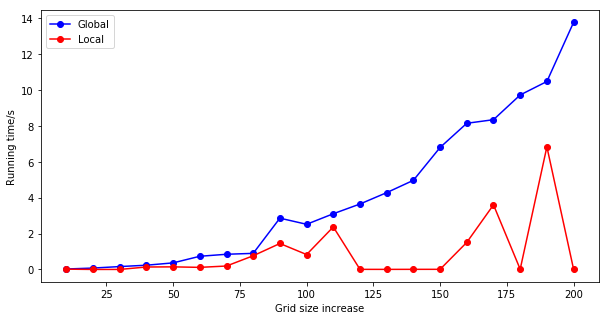

In [51]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
a =[*zip([(i+1)*10 for i in range(20)],time_list_for_global1)]
b =[*zip([(i+1)*10 for i in range(20)],time_list_for_local1)]
plt.plot(*zip(*a),'bo-',label='Global')
plt.plot(*zip(*b),'ro-',label='Local')
#plt.plot(time_list_for_global1,'bo-',label='Global')
#plt.plot(time_list_for_local1,'ro-',label='local')
plt.xlabel('Grid size increase')
plt.ylabel('Running time/s')
plt.legend()
plt.show()

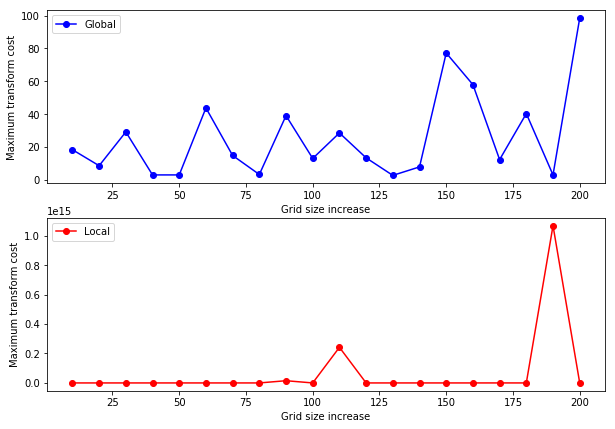

In [30]:
a =[*zip([(i+1)*10 for i in range(20)],max_trans_global1)]
b =[*zip([(i+1)*10 for i in range(20)],max_trans_local1)]

plt.figure(figsize = (10,7))
plt.subplot(2,1,1)
plt.plot(*zip(*a),'bo-',label='Global')
#plt.plot(max_trans_global1,'bo-',label='Global')
plt.xlabel('Grid size increase')
plt.ylabel('Maximum transform cost')
plt.legend()
plt.subplot(2,1,2)
plt.plot(*zip(*b),'ro-',label='Local')
#plt.plot(max_trans_local1,'ro-',label='Local')
plt.xlabel('Grid size increase')
plt.ylabel('Maximum transform cost')
plt.legend()
plt.show()

In [27]:
time_list_for_global =[]
time_list_for_local = []
max_trans_global =[]
max_trans_local =[]
for i in range(15):  
    agentlist=[str(ix) for ix in range((i+1)*2)]
    pos_dict,noise_dict = create_environment(40,agentlist,120)
    all_nodes_energy = node_energy(noise_dict,40, 120)
    start_time_for_global = time.time()
    cache_for_each_step,cache_for_transfer_cost=globalOptimisition(pos_dict,all_nodes_energy)
    time_list_for_global.append(time.time()-start_time_for_global)
    max_trans_global.append(max(cache_for_transfer_cost))
    start_time_for_local = time.time()
    global_cache_for_each_step,cache_for_global_transfer_cost =localSearch(all_nodes_energy,pos_dict, 0.1 )
    time_list_for_local.append(time.time()-start_time_for_local)
    max_trans_local.append(max(cache_for_global_transfer_cost))  

stop3
stop3
stop2
stop3
stop3
stop3
stop3
stop3
stop3
stop3
stop3
stop3
stop3
stop3
stop3


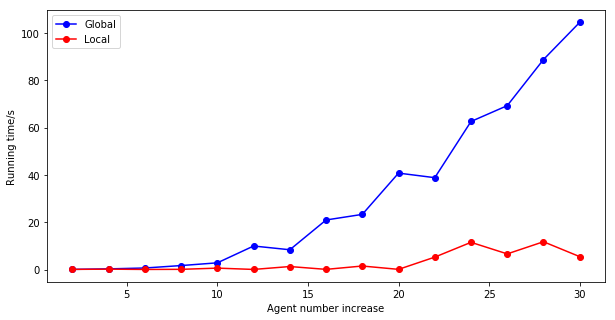

In [34]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
#plt.plot(time_list_for_global,'bo-',label='Global')
#plt.plot(time_list_for_local,'ro-',label='local')
a =[*zip([(i+1)*2 for i in range(15)],time_list_for_global)]
b =[*zip([(i+1)*2 for i in range(15)],time_list_for_local)]
plt.plot(*zip(*a),'bo-',label='Global')
plt.plot(*zip(*b),'ro-',label='Local')
plt.xlabel('Agent number increase')
plt.ylabel('Running time/s')
plt.legend()
plt.show()

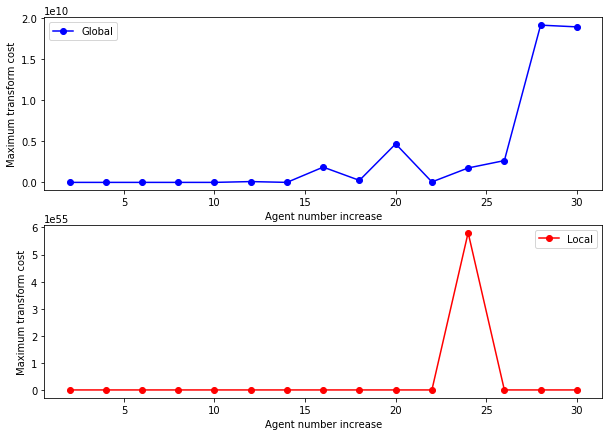

In [33]:
a =[*zip([(i+1)*2 for i in range(15)],max_trans_global)]
b =[*zip([(i+1)*2 for i in range(15)],max_trans_local)]

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(*zip(*a),'bo-',label='Global')
#plt.plot(max_trans_global,'bo-',label='Global')
plt.xlabel('Agent number increase')
plt.ylabel('Maximum transform cost')
plt.legend()
plt.subplot(2,1,2)
plt.plot(*zip(*b),'ro-',label='Local')
#plt.plot(max_trans_local ,'ro-',label='Local')
plt.xlabel('Agent number increase')
plt.ylabel('Maximum transform cost')
plt.legend()
plt.show()

# Algorithm 3 (cooperation & competition)

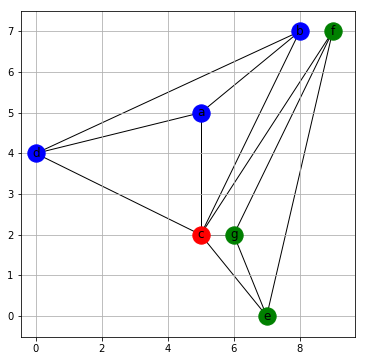

In [916]:
G = nx.Graph() # A two-dimensional grid graph 
#G = nx.grid_2d_graph(5, 5)
G.add_nodes_from(['a','b','c','d','e','f','g'])
G.add_edges_from([(x,y)for x in ['a','b','c','d'] for y in ['a','b','c','d']])
G.add_edges_from([(x,y)for x in ['c','e','f','g'] for y in ['c','e','f','g']])
grid_length = 10
noise = 40
pos_dict,noise_dict = create_environment(grid_length,['a','b','c','d','e','f','g'],noise)

#G.add_edges_from([(x,y) for x in range(3) for y in range(3)])
plt.figure(figsize = (6,6))
plt.grid('True')
nx.draw_networkx_nodes(G,pos = pos_dict,nodelist=['c'],node_color='red')
nx.draw_networkx_nodes(G,pos = pos_dict,nodelist=['a','b','d'],node_color='blue')
nx.draw_networkx_nodes(G,pos = pos_dict,nodelist=['e','f','g'],node_color='green')
nx.draw_networkx_labels(G, pos = pos_dict)
nx.draw_networkx_edges(G, pos = pos_dict)

In [47]:
def separateGroup(pos_dict,share_resourse_name_list,*one_company_list):
    company1= {}
    company2= {}
    if len(one_company_list)!=0:
        for item1 in one_company_list[0]:
            company1[item1]= pos_dict[item1]
        for item2 in list(pos_dict.keys()):
            if item2 not in one_company_list[0]:
                company2[item2] = pos_dict[item2]
        for item2_share in share_resourse_name_list:
            company2[item2_share] = pos_dict[item2_share]
    else:
        #if the uers don't give the one list for any one company, then random separate the groups
        if (len(pos_dict)- len(share_resourse_name_list))%2!=0:
            print('This is not a even number, the group sepeate with different number')
        for item in list(pos_dict.keys()):
            if item not in share_resourse_name_list and len(company1)<(len(pos_dict)- len(share_resourse_name_list))/2:
                company1[item]=pos_dict[item]
        for item_share in share_resourse_name_list:
            company1[item_share]=pos_dict[item_share]
            company2[item_share]=pos_dict[item_share]
        for item2 in list(pos_dict.keys()):
            if item2 not in list(company1.keys()):
                company2[item2]=pos_dict[item2] 
    return company1,company2

In [48]:
a,b= separateGroup(pos_dict,['a','b'],['a','b','c','d'])
print(a)
print(b)

{'a': (5, 5), 'b': (3, 3), 'c': (0, 4), 'd': (5, 2)}
{'a': (5, 5), 'b': (3, 3)}


In [769]:
def findTargetCC(pos_dict,zeroEnergyPoints, share_resourse_name_list, one_company_list, cooperation_rate, which_company):
    #This function try to find the shortest manhattan distance between all the initial points with all zero energy nodes 
    #and the zero energy points with shortest Manhattan can be the possible target
    #Output: a list of zero enery points with the shortest manhattan distance among all zero energy points
    company1, company2 = separateGroup(pos_dict,share_resourse_name_list,one_company_list)
    company_list=[company1, company2]
    distance_dict ={}
    for zeroPoint in zeroEnergyPoints:
        distance =0
        if which_company== 0: 
            for item1 in list(company1.values()):
                distance += (1-cooperation_rate/2)*manhattanDistance(zeroPoint,item1) #abs(x_z-x_item)+abs(y_z-y_item)
            for item2 in list(company2.values()):
                distance += (cooperation_rate/2)*manhattanDistance(zeroPoint,item2)
        elif which_company == 1:
            for item1 in list(company1.values()):
                distance += (cooperation_rate/2)*manhattanDistance(zeroPoint,item1) #abs(x_z-x_item)+abs(y_z-y_item)
            for item2 in list(company2.values()):
                distance += (1-cooperation_rate/2)*manhattanDistance(zeroPoint,item2)
                
        distance_dict[zeroPoint]=distance
        
    shortest_dictance = min(distance_dict.items(), key=operator.itemgetter(1))[1]
    shortest_dictance_zeroPoints = [item[0] for item in list(distance_dict.items()) if item[1]== shortest_dictance]
    return shortest_dictance_zeroPoints

In [334]:
def movingstrategyCC(agent_name, state_now,target, pos_dict, all_nodes_energy, *track_dict_value_list):

    generalMove =[-1,0,1]
    x_state_now = state_now[0]
    y_state_now = state_now[1]
    manhattanDistance_now = manhattanDistance(state_now, target)
    
    valid_orientation =[(x_state_now +i,y_state_now+ j) for i in generalMove for j in generalMove 
                        if (x_state_now +i,y_state_now+ j) in list(all_nodes_energy.keys())]# This step bound the moving in grid

    if len(track_dict_value_list)>0:
        avoid_repeat_orientation = [item for item in valid_orientation if item not in track_dict_value_list[0]]
        convergence_orientation =[item for item in avoid_repeat_orientation if manhattanDistance(item, target)<manhattanDistance_now]
    else:
        convergence_orientation =[item for item in valid_orientation if manhattanDistance(item, target)<manhattanDistance_now]
    energy_dict = {}
    for position in convergence_orientation:
        pos_copy = copy.deepcopy(pos_dict)#ignore the pos_dict change at there
        pos_copy[agent_name]= position
        energy = total_energy(pos_copy,all_nodes_energy,state_now,position)
        energy_dict[position]= energy

    lowest_energy = min(energy_dict.items(), key=operator.itemgetter(1))[1]
    lowest_energy_orientation_list = [item[0] for item in list(energy_dict.items()) if item[1]== lowest_energy] 
    
    return random.choice(lowest_energy_orientation_list)# 

In [847]:
def coopAndcomp(pos_dict,all_nodes_energy, share_resourse_name_list, cooperation_rate):

    #target_list = [copy.deepcopy(target1),copy.deepcopy(target2)]
    if cooperation_rate > 1 or cooperation_rate <0:
        print('Wrong cooperation_rate, cooperation_rate should between 0 and 1!')
        
    company1, company2 = separateGroup(pos_dict,share_resourse_name_list)
    company1_name=copy.deepcopy(list(company1.keys()))
    company_list =[company1, company2]
    
    
    zeroEnergyPoints = findConvergencePoints(all_nodes_energy)

    target1 = findTargetCC(pos_dict,zeroEnergyPoints, share_resourse_name_list, company1_name, cooperation_rate, 0)
    target2 = findTargetCC(pos_dict,zeroEnergyPoints, share_resourse_name_list, company1_name, cooperation_rate, 1)
    target=[random.choice(target1),random.choice(target2)]
  
    node_now = None
    energy_now = [total_energy(company,all_nodes_energy,list(company.values())[0],list(company.values())[0]) for company in company_list]
    # we initial energy as nodes energy add edge energy

    global_cost =[0,0]  # cost is different from energy_now, this is a accumulate value during the whole agnets moving 

    test_item_num = 10# for each target, we run test_item_num times to find the best policy

    cache_for_global_transfer_cost = [[0],[0]]
    cache_for_global_energy = [[],[]]
    cache_for_global_energy[0].append(energy_now[0])
    cache_for_global_energy[1].append(energy_now[1])
    global_cache_for_each_step =[]#This dict will record minimum energy and the points' position  at each step,
    global_cache_for_each_step.append(copy.deepcopy(pos_dict))
    #and energy is key , the points' position is values

    # A weight in [0,1]. Becajuse we work in an fuzzy system, sometime system energy decrease but transform cost increase.
    # we set an transform_weight for the situation that  :
    #when global system energy decrease and transform increasing < (2-transform_weight)*old_transform_Cost, then we update the global cache

    #share_resourse_name_list = ['e']
    #for find_role_num in range(test_item_num):
    pos = copy.deepcopy(pos_dict)
    track_dict = createTrackDict(pos_dict)
    i=0

    company_1_private=copy.deepcopy(company1)
    company_2_private=copy.deepcopy(company2)
    for i in share_resourse_name_list:
        del company_1_private[i]
        del company_2_private[i]


    company_private = [company_1_private, company_2_private]

    while True:
        if all(value1 == target[0] for value1 in list(company_1_private.values()))== True:
            if all(value2 == target[1] for value2 in list(company_2_private.values()))== True :
                print('break3')
                break
                
        for n in [0,1]:

            for agent_i in list(company_list[n].items()):

                track_dict_value_list=track_dict[agent_i[0]] 
                if agent_i[1]!=target[n]:
                    agent_name = agent_i[0]
                    agent_position = agent_i[1]
                    if agent_name not in share_resourse_name_list:
                        moving = movingstrategyCC(agent_name,agent_position, target[n], company_list[n], all_nodes_energy,track_dict_value_list)
                    else:
                        moving = movingstrategyCC(agent_name,agent_position, target[n], company_list[n], all_nodes_energy)
                    
                    pos[agent_name]=moving
                    company_list[n][agent_name]=moving
                    
                    subcompany1, subcompany2 = separateGroup(pos,share_resourse_name_list,company1_name)
                    subcompany=[subcompany1, subcompany2]
                    
                    company_1_private=copy.deepcopy(subcompany1)
                    company_2_private=copy.deepcopy(subcompany2)
                    for i in share_resourse_name_list:
                        del company_1_private[i]
                        del company_2_private[i]
                    
                    energy= total_energy(company_list[n],all_nodes_energy,agent_position,moving)
                    cache_for_global_energy[n].append(energy)
                    cache_for_global_transfer_cost[n].append(sum(cache_for_global_transfer_cost[n])+transfer_cost(agent_position,moving))
                    global_cache_for_each_step.append(copy.deepcopy(pos))
                    track_dict[agent_name].append(moving)
                elif all(value == target[n] for value in list(company_list[n].values()))==True:
                    break
                else:
                    next
            
    return target1,target2,target,global_cache_for_each_step,cache_for_global_transfer_cost,cache_for_global_energy

In [1007]:
grid_length = 15
noise = 40
cooperation_rate=  1
pos_dict,noise_dict = create_environment(grid_length,['a','b','c','d','e','f','g'],noise)
all_nodes_energy = node_energy(noise_dict,grid_length, noise)
share_resourse_name_list = ['e']
target1,target2,target,global_cache_for_each_step,cache_for_global_transfer_cost,cache_for_global_energy = \
coopAndcomp(pos_dict,all_nodes_energy, share_resourse_name_list, cooperation_rate)

print(target)
target1,target2

break3
[(2, 4), (2, 8)]


([(2, 4), (2, 8)], [(2, 4), (2, 8)])

In [977]:
target

[(2, 4), (2, 8)]

In [918]:
cache_for_global_transfer_cost[0]

[0,
 0.0,
 0.0,
 0.6321205588285577,
 2.3504023872876028,
 3.614643504944718,
 7.229287009889436,
 14.458574019778872,
 30.003309309188232,
 58.28833678991742,
 117.20879413866341,
 234.4175882773268,
 468.203055995825,
 936.40611199165,
 1873.4443445421286,
 3746.8886890842573,
 7493.145257609685,
 14986.922635778199,
 29973.21315099757,
 59947.05842255397,
 119893.48472454911,
 239787.60156965704,
 479574.57101875526,
 959149.7741580694,
 1918298.9161955798,
 3836597.8323911596,
 7673195.664782319,
 15346391.329564638]

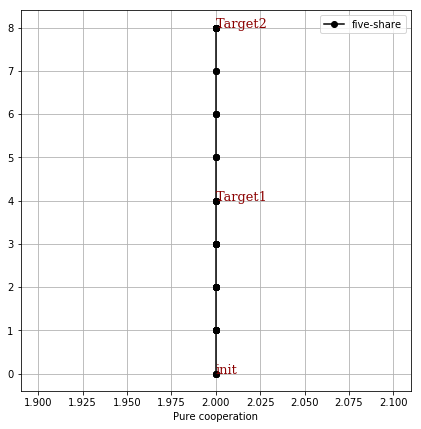

In [1008]:
acomp_track = [value['a'] for value in global_cache_for_each_step]
bcomp_track = [value['b'] for value in global_cache_for_each_step]
ccomp_track = [value['c'] for value in global_cache_for_each_step]
dcomp_track = [value['d'] for value in global_cache_for_each_step]
ecomp_track = [value['e'] for value in global_cache_for_each_step]
fcomp_track = [value['f'] for value in global_cache_for_each_step]
gcomp_track = [value['g'] for value in global_cache_for_each_step]

plt.figure(figsize = (7,7))
#plt.plot(*zip(*acomp_track),'bo-',label='one-company1')
#plt.plot(*zip(*bcomp_track),'ro-',label='two-company1')
#plt.plot(*zip(*ccomp_track),'yo-',label='three-company1')
#plt.plot(*zip(*dcomp_track),'co-',label='four-company2')
plt.plot(*zip(*ecomp_track),'ko-',label='five-share')
#plt.plot(*zip(*fcomp_track),'mo-',label='six-company2')
#plt.plot(*zip(*gcomp_track),'go-',label='seven-company2')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }
plt.text(2, 0, r'init', fontdict=font)
'''plt.text(5, 2, r'init3', fontdict=font)
plt.text(5, 5, r'init1', fontdict=font)
plt.text(8, 7, r'init2', fontdict=font)
plt.text(7, 0, r'init5', fontdict=font)
plt.text(6, 2, r'init7', fontdict=font)
plt.text(8.5, 6.5, r'init6', fontdict=font)'''
plt.text(2, 4, r'Target1', fontdict=font)
plt.text(2, 8, r'Target2', fontdict=font)
plt.xlabel('Pure cooperation')
plt.grid()
plt.legend()
plt.show()

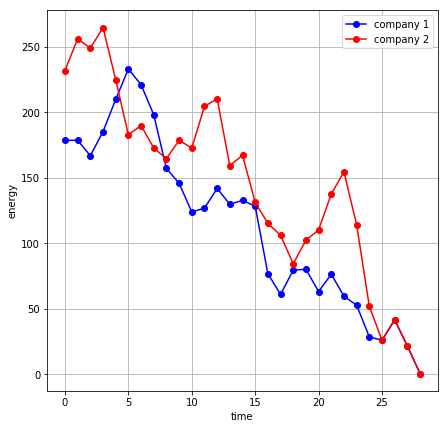

In [1005]:
plt.figure(figsize = (7,7))
#plt.plot([x/ max(cache_for_global_energy[0]) for x in cache_for_global_energy[0]],'bo-',label='company 1')
#plt.plot([x/ max(cache_for_global_energy[1]) for x in cache_for_global_energy[1]],'ro-',label='company 2')
plt.plot(cache_for_global_energy[0],'bo-',label='company 1')
plt.plot(cache_for_global_energy[1],'ro-',label='company 2')
plt.xlabel('time')
plt.ylabel('energy')
plt.grid()
plt.legend()
plt.show()

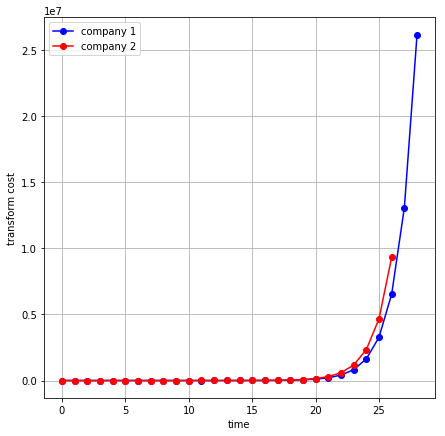

In [975]:
plt.figure(figsize = (7,7))
#plt.plot([x/ max(cache_for_global_transfer_cost[0]) for x in cache_for_global_transfer_cost[0]],'bo-',label='company 1')
#plt.plot([x/ max(cache_for_global_transfer_cost[1]) for x in cache_for_global_transfer_cost[1]],'ro-',label='company 2')
plt.plot(cache_for_global_transfer_cost[0],'bo-',label='company 1')
plt.plot(cache_for_global_transfer_cost[1],'ro-',label='company 2')
plt.xlabel('time')
plt.ylabel('transform cost')
plt.grid()
plt.legend()
plt.show()

In [964]:
max_trans=[[],[]]
for cooperation_rate in [0.1*x for x in range(10)]:
    grid_length = 15
    noise = 40
    #cooperation_rate=  1
    pos_dict,noise_dict = create_environment(grid_length,['a','b','c','d','e','f','g'],noise)
    all_nodes_energy = node_energy(noise_dict,grid_length, noise)
    share_resourse_name_list = ['e']
    target1,target2,target,global_cache_for_each_step,cache_for_global_transfer_cost,cache_for_global_energy = \
    coopAndcomp(pos_dict,all_nodes_energy, share_resourse_name_list, cooperation_rate)
    max_trans[0].append(cache_for_global_transfer_cost[0][-1])
    max_trans[1].append(cache_for_global_transfer_cost[1][-1])

max_trans    

break3
break3
break3
break3
break3
break3
break3
break3
break3
break3


[[146426886.81542784,
  73197470.92177947,
  26158936.361266084,
  26158936.361266084,
  26158936.361266084,
  73197470.92177947,
  73197470.92177947,
  26158936.361266084,
  26158936.361266084,
  26158936.361266084],
 [27997357.38422843,
  27997357.38422843,
  27997357.38422843,
  27997357.38422843,
  27997357.38422843,
  9329617.01954785,
  9329617.01954785,
  9329617.01954785,
  27997357.38422843,
  9329617.01954785]]

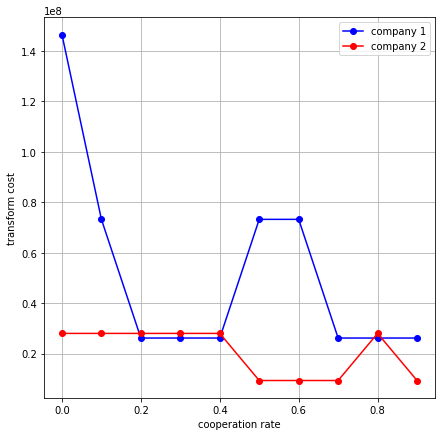

In [974]:
plt.figure(figsize = (7,7))
#plt.plot([x/ max(cache_for_global_transfer_cost[0]) for x in cache_for_global_transfer_cost[0]],'bo-',label='company 1')
#plt.plot([x/ max(cache_for_global_transfer_cost[1]) for x in cache_for_global_transfer_cost[1]],'ro-',label='company 2')
a =[*zip([0.1*x for x in range(10)],max_trans[0])]
b =[*zip([0.1*x for x in range(10)],max_trans[1])]
plt.plot(*zip(*a),'bo-',label='company 1')
plt.plot(*zip(*b),'ro-',label='company 2')
plt.xlabel('cooperation rate')
plt.ylabel('transform cost')
plt.grid()
plt.legend()
plt.show()

In [971]:
a=[1,2,3]
b=[1,2,3]
a =[*zip([0.1*x for x in range(10)],max_trans[0])]
a

[(0.0, 146426886.81542784),
 (0.1, 73197470.92177947),
 (0.2, 26158936.361266084),
 (0.30000000000000004, 26158936.361266084),
 (0.4, 26158936.361266084),
 (0.5, 73197470.92177947),
 (0.6000000000000001, 73197470.92177947),
 (0.7000000000000001, 26158936.361266084),
 (0.8, 26158936.361266084),
 (0.9, 26158936.361266084)]